<a href="https://colab.research.google.com/github/sravannaidu/GenAI/blob/main/Case_Study_Mail_Spam_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Identifying relavant US Economy News Articles

-- The dataset consist of 8000 news articles annotated with whether or not they are relavant to US Economy (i.e. a yes/no binary classification).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/email_data.csv', encoding="latin1")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [3]:
df.shape

(5171, 4)

In [4]:
# Relavant Article : Talks about gas control
df.loc[0, 'text']

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [5]:
# Non Relavant Article : Looks like talking about Norms
df.loc[1, 'text']

'Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls'

In [6]:
# Distribution on target variable looks non-uniform

df['label'].value_counts(normalize=True)

,proportion
label,
ham,0.710114
spam,0.289886


In [7]:
#df['label'] = np.where(df['label']=='not sure','no',df['relevance'])

In [8]:
df['label'].value_counts(normalize=True)

,proportion
label,
ham,0.710114
spam,0.289886


In [10]:
# Convert label to a numerical variable
df['label'] = df.label.map({'spam':1, 'ham':0})
# relevant is 1, non-relevant is 0
df['label'].value_counts(normalize=True)

,proportion
label,
0,0.710114
1,0.289886


In [11]:
df['text']

,text
0,Subject: enron methanol ; meter # : 988291\nth...
1,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\nthis deal is to ...
...,...
5166,Subject: put the 10 on the ft\nthe transport v...
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168,Subject: calpine daily gas nomination\n>\n>\nj...
5169,Subject: industrial worksheets for august 2000...


In [12]:
# Visualization on overall Word Cloud from the given dataset
!pip install wordcloud

In [13]:

from wordcloud import WordCloud

wc = WordCloud(width=1600, height=800, background_color='blue',).generate(' '.join(df['text']))

In [14]:
wc

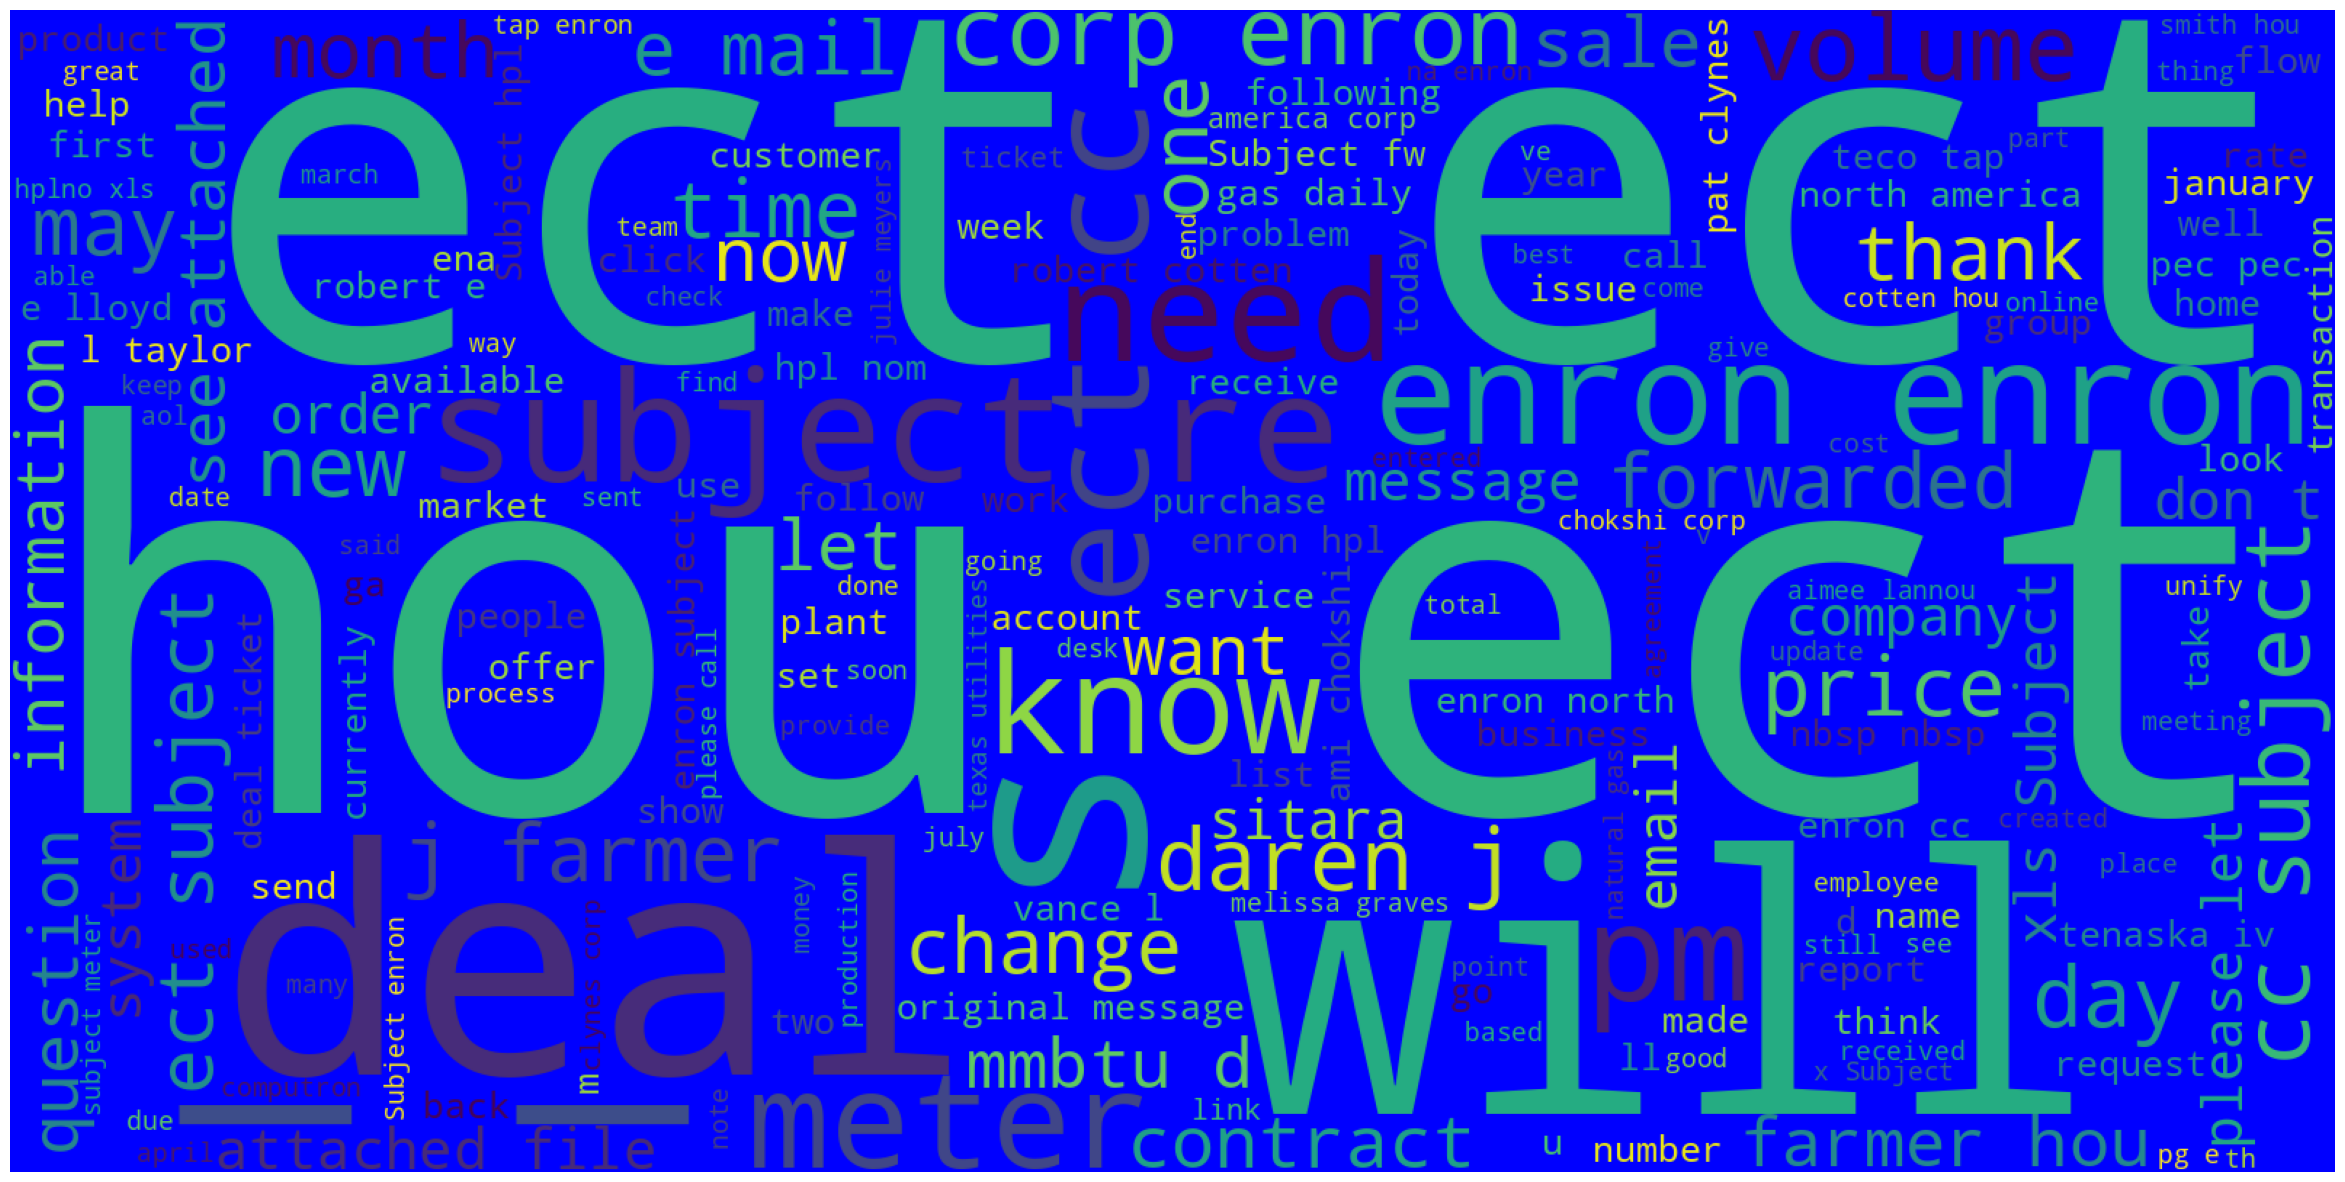

In [15]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
# Let us take only the two columns we need
df = df[["text", "label"]]
df.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


# Step 1 - Identify input and output

In [17]:
x = df.text
y = df.label
print(x.shape, y.shape)

(5171,) (5171,)


In [18]:
y

,label
0,0
1,0
2,0
3,1
4,0
...,...
5166,0
5167,0
5168,0
5169,0


In [19]:
y.value_counts(normalize=True)

,proportion
label,
0,0.710114
1,0.289886


In [20]:
y.value_counts()

,count
label,
0,3672
1,1499


# Step 2 - Split the Data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=0, stratify=y)
print(x_train.shape, y_train.shape)
print()
print(x_test.shape, y_test.shape)

(3878,) (3878,)

(1293,) (1293,)


In [22]:
x_train

,text
532,Subject: # 9760\ntried to get fancy with your ...
4963,Subject: fw : more megan pics\n?\n- - - - - or...
597,Subject: absentminded volition cavil corpus de...
4003,Subject: syn bank group offer\nsyn bank group ...
244,"Subject: get cheap via - gra\ngeneric viagra ,..."
...,...
1802,Subject: lst rev may 2000 hpl nom\nfyi\n- - - ...
3360,Subject: ei 314 revised availability effective...
4310,"Subject: hpl nom for march 28 , 2001\n( see at..."
4033,Subject: re : mtr 6063 - mokeen lateral\nvance...


# Step 3 - Data Preprocessing on train data (x_train)

In [23]:
from wordcloud import WordCloud
def display_wordcloud(data):
    wc = WordCloud(width=1600, height=800, background_color='blue',).generate(' '.join(data))
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

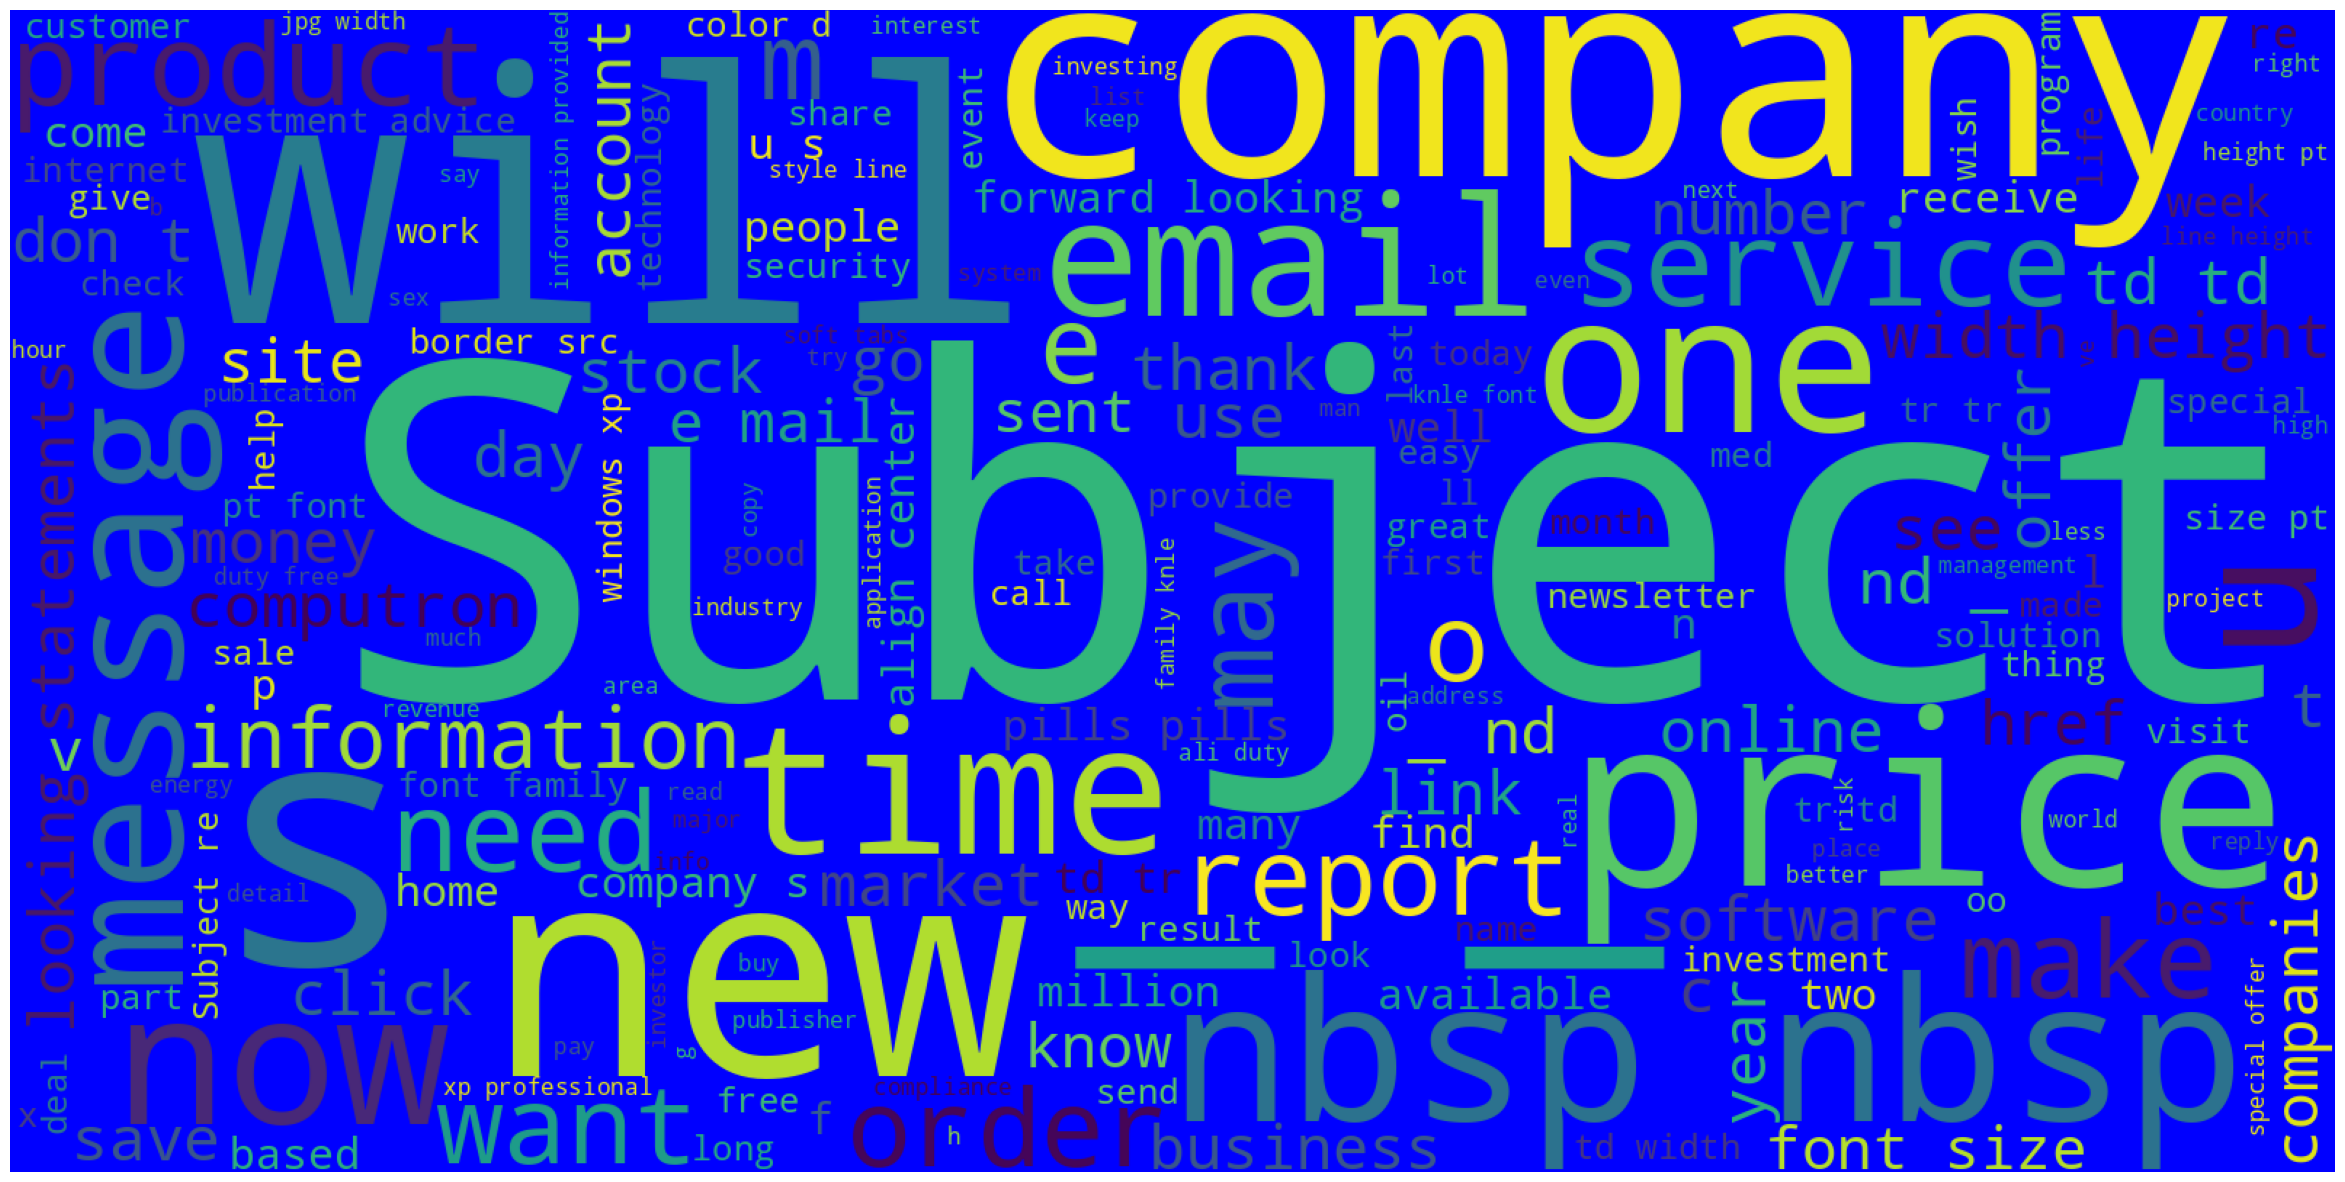

In [24]:
# Display the wordcloud for US Economy News Articles
display_wordcloud(x_train[y_train==1])

In [38]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [30]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [31]:
#nltk.download('wordnet')

In [32]:
#editorial = "Microcrystalline Cellulose (MCC) is chemically inert. The human body does not absorb it. The skin does not react to it. But it has several useful physical properties such as being a binder and texturiser, which is why it has varied applications in the pharmaceutical, food, cosmetics and other industries. MCC can add weight to a drug and facilitate the active ingredients to function effectively while making the drug conform to weight specifications. On Monday (June 30, 2025), however, the pharma unit of Sigachi Industries in Hyderabad, which makes this benign substance, was the scene of a lethal accident, with the toll rising to 36 on Tuesday (July 1, 2025). The making of this safe substance does involve risky processes, which can, however, be safe if appropriate procedures are followed by trained personnel. Most of the dead are young, poor, migrant workers from northern and eastern India who often lack social support. The Telangana government has announced an ex gratia of ₹1 crore and efforts must be made to ensure it reaches the families. It does seem that the response of mitigation agencies was timely and is ongoing."

In [33]:
#editorial

In [34]:
from nltk import word_tokenize, sent_tokenize
#word_tokenize(editorial)

In [35]:
#sent_tokenize(editorial)

In [36]:
def clean(doc):
    doc = doc.replace("Subject>", " ")
    # remove punctuation and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = doc.lower()
    tokens = nltk.word_tokenize(doc)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [39]:
# import feature extraction method from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer(preprocessor=clean)

%time x_train_dtm = vect.fit_transform(x_train)
print(x_train_dtm.shape)

CPU times: user 8.37 s, sys: 179 ms, total: 8.55 s
Wall time: 9.37 s
(3878, 37826)


In [40]:
pd.DataFrame(x_train_dtm.toarray())

,0,1,2,3,4,5,6,7,8,9,...,37816,37817,37818,37819,37820,37821,37822,37823,37824,37825
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4 - Data Preprocessing on test data (x_test)

In [41]:
x_test_dtm = vect.transform(x_test)
print(x_test_dtm.shape)

(1293, 37826)


# Step 5 - Building a Model (Naive Bayes Classifier)

--- This model is only for classifier problem and specifically for text analytics

In [42]:
# Niave Bayes Theorem - Text Analytics

from sklearn.naive_bayes import MultinomialNB
nbayes = MultinomialNB()
%time nbayes.fit(x_train_dtm, y_train)

CPU times: user 5.29 ms, sys: 23 µs, total: 5.31 ms
Wall time: 11.9 ms


MultinomialNB()

# Step 6 - Evaluating on Train data

In [43]:
from sklearn import metrics
y_train_pred = nbayes.predict(x_train_dtm)
metrics.accuracy_score(y_train, y_train_pred)

0.9850438370293966

# Step 7 - Evaluate on Test Data

In [44]:
y_test_pred = nbayes.predict(x_test_dtm)
metrics.accuracy_score(y_test, y_test_pred)

0.9775715390564579

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       918
           1       0.97      0.95      0.96       375

    accuracy                           0.98      1293
   macro avg       0.98      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



In [47]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2754
           1       0.98      0.96      0.97      1124

    accuracy                           0.99      3878
   macro avg       0.98      0.98      0.98      3878
weighted avg       0.99      0.99      0.98      3878



# Random Forest Classifier model

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_dtm, y_train)

RandomForestClassifier()

In [49]:
y_train_pred1 = rf.predict(x_train_dtm)
print("Training Accuracy :",metrics.accuracy_score(y_train, y_train_pred1))

y_test_pred1 = rf.predict(x_test_dtm)
print("Test Accuracy :",metrics.accuracy_score(y_test, y_test_pred1))

Training Accuracy : 1.0
Test Accuracy : 0.9783449342614076


In [50]:
x_train_dtm.shape, y_train.shape

((3878, 37826), (3878,))

In [52]:
# Cross Validation method
# from sklearn.model_selection import cross_val_score
# training = cross_val_score(estimator=rf, x_train_dtm, y_train, cv=10,)
# training.mean()

In [53]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train_dtm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_train_pred2 = xg.predict(x_train_dtm)
print("Training Accuracy :",metrics.accuracy_score(y_train, y_train_pred2))

y_test_pred2 = xg.predict(x_test_dtm)
print("Test Accuracy :",metrics.accuracy_score(y_test, y_test_pred2))

Training Accuracy : 0.9920061887570912
Test Accuracy : 0.9760247486465584
